/Users/jonathandrori/miniconda2/envs/LIGO/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: parseCommands depreciated, use parse.


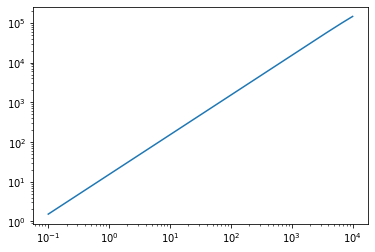

In [3]:
from pykat import finesse, components                  # Importing the pykat.finesse package
import matplotlib.pyplot as plt

basekat = finesse.kat()    # Initialising Finesse
basekat.verbose = False    # Tells Finesse to talk less

basecode = """
## Parameters ##
const Pin 1M         # Laser power (1 MW)
const LX 1        # Length of X arm (4000 m)
const LY 1        # Length of Y arm (4000 m)
const param0023 209.6461699863487
const param0019 8.961761774822417
const param0013 68.9984099716269
const param0012 197.23845827858102
const param0010 0.0022026788601023305

## Laser & Beam splitter ##
l laser $Pin 0 n0                         # Laser
s s1 1 n0 nbsc                            # Space from laser to beam splitter
bs1 BS3 $param0010 0 $param0012 $param0013 nbsX nbsY nbsd nbsc    # Beam splitter (R = T = 0.5, phi = 0 deg, 
                                          # AoI = 45 deg).
## X arm ##
s LX $LX nbsX nmX1         # Space, BS to mX (4000 m)
m1 mX 0 0 $param0023 nmX1 nmX2      # Mirror mX (R = 1, T = 0, phi = 0 deg)

## Y arm ##
s LY $LY nbsY nmY1         # Space, BS to mY (4000 m)
m1 mY 0 0 $param0019 nmY1 nmY2      # Mirror mY (R = 1, T = 0, phi = 0 deg)

## Output port ##
s sout 1 nbsd nout         # Space, BS to output

## Detectors ##
pd pout nout      # Photo diode measuring DC-power
pd1 poutf $fs nout

## Simulation instructions ##
# Varying the differential arm length
#xaxis mX phi lin -90 90 200      # Sweeps phi of mX from -90 to 90 in 200 linear steps 

#put* mY phi $mx1                 # Takes the negative (m in $mx1 is keyword for minus) 
                                 # value from the xaxis and puts it in phi of mY.
yaxis abs                        # Returns magnitude of detector outputs

fsig ETMXfsig mX 1 0
fsig ETMYfsig mY 1 180

xaxis ETMXfsig f log 0.1 1e4 200
"""
# Parsing the FINESSE code
basekat.parseCommands(basecode)
# Running the simulation
out = basekat.run()
plt.loglog(out.x, out['poutf'])